> "In statistical hypothesis testing, the p-value or probability value is, for a given statistical model, the probability that, when the null hypothesis is true, the statistical summary (such as the sample mean difference between two groups) would be equal to, or more extreme than, the actual observed results."

## Let's state a hypothesis 'exercising does not affect weight'
    * call it the null hypothesis as it is the status quo we consider to be true
    * our alternative hypothesis is the flip: exercising does reduce weight
## So now we collect data 
    * weight loss data for a sample of 10 ppl who exercise regularly for 3 months
        * weightloss sample mean = 2kg
        * sample standard deviation = 1kg
* But how do we prove/disprove our hypothesis?

## How can we quantify this and put some maths behind it all?

Rewriting

### Experiment
* Hº: Exercising does not affect weight. Or equivalently 𝜇 = 0
* Hᴬ: Exercise does reduce weight. Or equivalently 𝜇>0
* We see our data sample of 10 people, and we try to find out the value of
    * Observed Mean(Weightloss of People who exercise) = 2 kg
    * Observed Sample Standard Deviation = 1 kg

### Assuming that the null hypothesis is true, what is the probability of observing a sample mean of 2 kg or more extreme than 2 kg?
* Assuming we can calculate this probability and If this probability value is small (lesser than a threshold value), we reject our null hypothesis. 
* otherwise, we fail to reject our null hypothesis. 
* <b> this probability is the p-value </b>
    * basically, it isthe probability of observing what we observed or extreme results if we assume our null hypothesis is true
    * The statisticians call the threshold as the significance level(𝜶), and in most of the cases, 𝜶 is taken to be 0.05.
    
# How do we answer?

## Look to the normal distribution
* We create a Sampling Distribution of the mean of the WeightLoss samples assuming our Null hypothesis is True.


## Central Limit Theorem: 
> The central limit theorem simply states that if you have a population with mean μ and standard deviation σ, and take random samples from the population, then the distribution of the sample means will be approximately normally distributed with mean as the population mean and standard deviation σ/√n. Where σ is the standard deviation of the sample and n is the number of observations in the sample.

* Now we already know the mean of our population as given by our null hypothesis. So, we use that and have a normal distribution whose mean is 0. And whose standard deviation is given by 1/√10

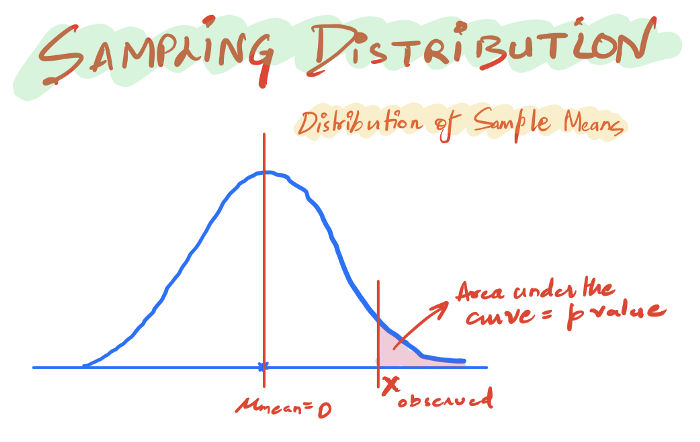
* Now we can use some statistical software to find the area under this particular curve:

In [1]:
from scipy.stats import norm
import numpy as np
p = 1-norm.cdf(2, loc=0, scale = 1/np.sqrt(10))
print(p)

1.269814253745949e-10


* this value is pretty small (for significance level of 0.5) for the mean of a sample to take a value of 2 or more

---
# z-statistic
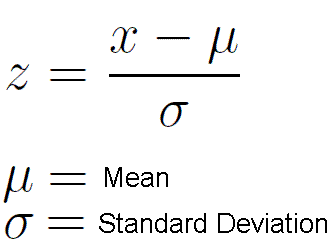

* Simply put, a z-score (also called a standard score) gives you an idea of how far from the mean a data point is.

In [3]:
z = (2-0)/(1/np.sqrt(10))
print(z)

6.324555320336758


* Just looking at the Z statistic of >6 should give you an idea that the observed value is at least six standard deviations away and so the p-value should be very small. We can still find the p-value using:

In [4]:
from scipy.stats import norm
import numpy as np
p = 1-norm.cdf(z, loc=0, scale=1)
print(p)

1.269814253745949e-10


* same value! but in a different way

--

# The T Score.

> The t test tells you how significant the differences between groups are; In other words it lets you know if those differences (measured in means) could have happened by chance.

* The t score is a ratio between the difference between two groups and the difference within the groups. 
    * The larger the t score, the more difference there is between groups. 
    * The smaller the t score, the more similarity there is between groups. 
    * A t score of 3 means that the groups are three times as different from each other as they are within each other. 
    * When you run a t test, the bigger the t-value, the more likely it is that the results are repeatable.

* A large t-score tells you that the groups are different.
* A small t-score tells you that the groups are similar.


## Independent samples T test
* The independent samples t test (also called the unpaired samples t test) is the most common form of the T test. It helps you to compare the means of two sets of data. For example, you could run a t test to see if the average test scores of males and females are different; the test answers the question, “Could these differences have occurred by random chance?” 
* The two other types of t test are:
    * One sample t test: used to compare a result to an expected value. 
        * For example, do males score higher than the average of 70 on a test if their exam time is switched to 8 a.m.?
    * Paired t test (dependent samples): used to compare related observations. 
        * For example, do test scores differ significantly if the test is taken at 8 a.m. or noon?

* This test is extremely useful because for the z test you need to know facts about the population, like the population standard deviation. With the independent samples t test, you don’t need to know this information. You should use this test when:

    * You do not know the population mean or standard deviation.
    * You have two independent, separate samples.


### Assumptions for the Independent Samples T Test

1. Assumption of Independence: you need two independent, categorical groups that represent your independent variable. In the above example of test scores “males” or “females” would be your independent variable.
2. Assumption of normality: the dependent variable should be approximately normally distributed. The dependent variable should also be measured on a continuous scale. In the above example on average test scores, the “test score” would be the dependent variable.
3. Assumption of Homogeneity of Variance: The variances of the dependent variable should be equal.


---
# One Tailed Test or Two in Hypothesis Testing; One Tailed Distribution Area

## how to decide

* Example question #1: A government official claims that the dropout rate for local schools is 25%. Last year, 190 out of 603 students dropped out. Is there enough evidence to reject the government official’s claim?

* Example question #2: A government official claims that the dropout rate for local schools is less than 25%. Last year, 190 out of 603 students dropped out. Is there enough evidence to reject the government official’s claim?

* Example question #3: A government official claims that the dropout rate for local schools is greater than 25%. Last year, 190 out of 603 students dropped out. Is there enough evidence to reject the government official’s claim?

> *  Step 1: Read the question.

> * Step 2: Rephrase the claim in the question with an equation.
    * In example question #1, Drop out rate = 25%
    * In example question #2, Drop out rate < 25%
    * In example question #3, Drop out rate > 25%.
> * Step 3: If step 2 has an equals sign in it, this is a two-tailed test. If it has > or < it is a one-tailed test.

## when to use one-tailed?
* In the above examples, you were given specific wording like “greater than” or “less than.” Sometimes you, the researcher, do not have this information and you have to choose the test.

* For example, you develop a drug which you think is just as effective as a drug already on the market (it also happens to be cheaper). 
    * You could run a two-tailed test (to test that it is more effective and to also check that it is less effective).
    * But you don’t really care about it being more effective, just that it isn’t any less effective (after all, your drug is cheaper).
    * You can run a one-tailed test to check that your drug is at least as effective as the existing drug.


# When to Choose a Paired T Test / Paired Samples T Test / Dependent Samples T Test

## Paired T Test
* Choose the paired t-test if you have two measurements on the same item, person or thing. 
    * You should also choose this test if you have two items that are being measured with a unique condition.
    * For example, you might be measuring car safety performance in vehicle research and testing and subject the cars to a series of crash tests. Although the manufacturers are different, you might be subjecting them to the same conditions.
    * A paired t-test is used when we are interested in the difference between two variables for the same subject. 
* An unpaired t-test compares the means of two independent or unrelated groups. In an unpaired t-test, the variance between groups is assumed to be equal. In a paired t-test, the variance is not assumed to be equal.
* Examples
    * Knee MRI costs at two different hospitals,
    * Two tests on the same person before and after training,
    * Two blood pressure measurements on the same person using different equipment.
    
## regular two sample t test
* you're comparing the means for two diff samples
    i.e. test two different groups of customer service associates on a business-related test or testing students from two universities on their English skill
    
* If you take a random sample each group separately and they have different conditions, your samples are independent and you should run an independent samples t test (also called between-samples and unpaired-samples).


## independent samples t test
* The independent samples t test (also called the unpaired samples t test) is the most common form of the T test. 
* It helps you to compare the means of two sets of data. For example, you could run a t test to see if the average test scores of males and females are different; the test answers the question, “Could these differences have occurred by random chance?” The two other types of t test are:
     * One sample t test: used to compare a result to an expected value. For example, do males score higher than the average of 70 on a test if their exam time is switched to 8 a.m.?
    * Paired t test (dependent samples): used to compare related observations. For example, do test scores differ significantly if the test is taken at 8 a.m. or noon?
    
* This test is extremely useful because for the z test you need to know facts about the population, like the population standard deviation. With the independent samples t test, you don’t need to know this information. You should use this test when:
    * You do not know the population mean or standard deviation.
    * You have two independent, separate samples.    
----

# T-Values and P-values

* How big is “big enough”? 
    * Every t-value has a p-value to go with it. 
    * A p-value is the probability that the results from your sample data occurred by chance. 
    * P-values are from 0% to 100%. 
    * They are usually written as a decimal. 
        * For example, a p value of 5% is 0.05. Low p-values are good; 
            * They indicate your data did not occur by chance. 
        * For example, a p-value of .01 means there is only a 1% probability that the results from an experiment happened by chance. 
    * In most cases, a p-value of 0.05 (5%) is accepted to mean the data is valid.
* With a “regular” two sample t test, you’re comparing the means for two different samples. 
    * For example, you might test two different groups of customer service associates on a business-related test or testing students from two universities on their English skills. 
    * If you take a random sample each group separately and they have different conditions, your samples are independent and you should run an independent samples t test (also called between-samples and unpaired-samples).
    
    
    
 
# Alpha level
* Alpha levels (sometimes just called “significance levels”) are used in hypothesis tests; it is the probability of making the wrong decision when the null hypothesis is true. 
    * A one-tailed test has the entire 5% of the alpha level in one tail (in either the left, or the right tail). 
    * A two-tailed test splits your alpha level in half (as in the image to the left).
* Let’s say you’re working with the standard alpha level of 0.5 (5%). A two tailed test will have half of this (2.5%) in each tail. Very simply, the hypothesis test might go like this:

1. A null hypothesis might state that the mean = x. You’re testing if the mean is way above this or way below.
2. You run a t-test, which churns out a t-statistic.
3. If this test statistic falls in the top 2.5% or bottom 2.5% of its probability distribution (in this case, the t-distribution), you would reject the null hypothesis.

* The “cut off” areas created by your alpha levels are called <b>rejection regions</b>. It’s where you would reject the null hypothesis, if your test statistic happens to fall into one of those rejection areas. The terms “one tailed” and “two tailed” can more precisely be defined as referring to where your rejection regions are located.


 
    
# P Value vs Alpha level

* Alpha levels are controlled by the researcher and are related to confidence levels. You get an alpha level by subtracting your confidence level from 100%. 
    * For example, if you want to be 98 percent confident in your research, the alpha level would be 2% (100% – 98%).
    * When you run the hypothesis test, the test will give you a value for p. Compare that value to your chosen alpha level. 
* For example, let’s say you chose an alpha level of 5% (0.05). If the results from the test give you:
    * A small p (≤ 0.05), reject the null hypothesis. This is strong evidence that the null hypothesis is invalid.
    * A large p (> 0.05) means the alternate hypothesis is weak, so you do not reject the null.